#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 1


### Name: Christina Liu


### Due: Oct. 2, 2019


## Goal:  The goal of this homework is to practice implementing a logistic regression model and gradient descent as well as to explore some theoretical concepts.

You will need the following packages below to do the homework.  Please DO NOT import any other packages.

In [63]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

## Problem 1: Gradient Descent (40 pts total)

In this problem we will study gradient descent for optimization.

### Part (a) (10pts) Implementing gradient descent with a fixed learning rate

Using autograd, implement gradient descent with a fixed learning rate for a general function.

In [64]:
"""
Input:
    fun : function
    x0  : initial point
    lr  : fixed learning rate
    iterations : number of iterations to perform
    
Return:
    x   : minimizer to fun
"""
def gradient_descent_fixed(fun, x0, lr, iterations):
    # compute gradient
    gradient = grad(fun)
    
    x = x0
    cost_history = np.zeros(iterations//10)
    weight_history = np.zeros((iterations//10, 21))
                            
    for i in range(iterations):
        grad_val = gradient(x)
        x = x - (lr * grad_val)
        if (i % 10 == 0):
            cost_history[i//10] = fun(x)
            weight_history[i//10] = x
    return x, cost_history, weight_history

### Part (b) (10 pts) Using a variable learning rate

Sometimes it is necessary to decrease our learning rate as we iterate to help gradient descent converge.  Implement gradient descent below where the learning rate at iteration $i$ is given by
$$
\mathrm{lr}_i = \frac{\mathrm{lr}_0}{i+1}.
$$

In [65]:
"""
Input:
    fun : function
    x0  : initial point
    lr  : initial learning rate
    iterations : number of iterations to perform
    
Return:
    x   : minimizer to fun
"""
def gradient_descent_variable(fun, x0, lr, iterations): 
    # compute gradient
    gradient = grad(fun)

    x = x0
    cost_history = np.zeros(iterations//10)
    weight_history = np.zeros((iterations//10, 21))
    
    for i in range(iterations):
        grad_val = gradient(x)
        curr_lr = lr/(i+1)
        x = x - (curr_lr * grad_val)
        
        if (i % 10 == 0):
            cost_history[i//10] = fun(x)
            weight_history[i//10] = x
        
    return x, cost_history, weight_history

### Part (c) (10 pts)  Choosing the learning rate

Let $\alpha$ denote the learning rate and consider the function $f(x) = \frac{1}{2}x^2$.  The gradient descent update rule at iteration $n+1$ is given by
$$
x_{n+1} = x_n - \alpha f'(x_n)
$$
Is there a critical value $\alpha_0$ so that if $\alpha \ge \alpha_0$ then gradient descent will not converge for $f(x)$?  If so what is it and explain why?

*Answer goes here:*

If $f(x_{n+1}) \leq f(x_{n})$ at every iteration of gradient descent, it converges until it until it reaches the optimal value $f(x) = f(x^{*})$. This convergence result only holds when we choose a learning rate $\alpha$ to be small enough. Otherwise, a gradient descent with a learning rate too large will diverge. 


We can find a critical value $\alpha_0$ (learning rate) where gradient descent will not converge, when $f(x_{n+1}) \geq f(x_{n})$ is observed.

Below, we have found a critical value $\alpha_{0} = 2$, such that when  $\alpha \ge 2$, gradient descent for function $f(x) = \frac{1}{2}x^2$ will *not* converge.

$$
f(x_{n+1}) \geq f(x_{n})
$$

$$
f(x_{n+1}) - f(x_{n}) \geq 0
$$

$$
\frac{1}{2}(x_{n+1})^{2} - \frac{1}{2}(x_{n})^{2} \geq 0
$$

$$
\frac{1}{2}(x_{n+1})^{2} - \frac{1}{2}(x_{n})^{2} \geq 0
$$

$$
\frac{1}{2}(x_{n}-\alpha x_{n})^{2} - \frac{1}{2}(x_{n})^{2} \geq 0
$$

$$
\frac{1}{2} x_{n}^2 (1-2 \alpha + \alpha ^2 -1) \geq 0
$$

$$
\frac{1}{2} x_{n}^2 (-2 \alpha + \alpha ^2) \geq 0
$$

$$
-2 \alpha + \alpha ^2 \geq 0
$$


$$
\alpha \geq 0 \ or \ \boxed{\alpha \geq 2}
$$



### Part (d)  (10 pts) Feature scaling

Oftentimes it is advantageous to rescale or normalize our features.  As a toy example suppose we want to predict a person's weight (in kgs.) based on their height.  We would like an algorithm that gives equally good predictions whether height is measured in centimeters or kilometers.  For a concrete example, consider the 2D optimization problems:
$$
\mathrm{argmin}_{x\in \mathbb{R}^2}\ x^T \Sigma_i x, \quad i = 1,2
$$
where
$$
\Sigma_1 = \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix}, \quad 
\Sigma_2 = \begin{bmatrix}
1 & 0\\
0 & 100
\end{bmatrix}.
$$
Suppose our starting point is the same $x_0 = (1, 1)^T$ for both optimization problems.  For a fixed learning rate, will gradient descent perform better on problem $i=1$ or $i=2$?  Explain why.

*Answer goes here:*

For a fixed learning rate, gradient descent will perform better on a problem with a small range -- i.e. the smaller the range of the problem, the less values that need to be tested before reaching convergence.

In this example, gradient descent will perform better on problem $i=1$ because it involves a smaller range of values than problem $i=2$.

## Problem 2:  Logistic Regression (60 pts total)

In this problem you will implement all of the steps that are taken care of whenever the "fit" function from sci-kit is called.

### Part (a) (15 pts) Logistic Unit

For binary classification $y \in \{0,1\}$ we will model the posterior probability $p(y = 1 | x)$ with the logistic unit 
$$
h(x; w) = \frac{1}{1 + \exp(-w^Tx)}
$$
We will use the convention that $x_0 = 1$.  Implement this function below using the skeletal outline as a guide.  Suppose we use a discriminant function $f(x)$ which assigns the label $y = 1$ if $p(y = 1 | x) \ge 0.5$ and $0$ otherwise.  In other words, with a discriminant function we do not need the posterior probabilities but rather skip straight to the classification.  


Give a geometric interpretation of our classifier once the parameters $w$ have been learned.  What does the angle between $w$ and $x$ tell us about the predicted class value?  For which angles do we predict $y=1$?

In [66]:
"""
Input:
    w: weight vector
    X: data

Return:
    logits : h(x;w)
"""

def logistic_unit(X, w):
    z = np.dot(w,np.transpose(X))
    logits = 1/(1+np.exp(-z))
    return logits


*Answer goes here:*

Our classifier once the parameters $w$ have been learned is a hyperplane perpendicular to $w$ which divides our space into points labeled $y=1$ and points labeled $y=0$ (a decision boundary).

The angle between $w$ and $x$ (let's call $\theta$) can tell us whether the prediced class value is $y=1$ OR $y=0$.

Our logistic unit outputs a probability value $\in [0,1]$ and largely depends on variable value $w^Tx$
$$
h(x; w) = \frac{1}{1 + \exp(-w^Tx)}
$$

Knowing that $w^Tx =  \lvert w^T \rvert \ \lvert x \rvert \cdot cos(\theta)$, we can deduce:

- if $cos(\theta) \leq 90^{\circ}$,
    - then $w^Tx \geq 0$, which makes logistic unit output a probability $0.5 < h(x) < 1$
    - $\implies$ label $y=1$
- else, if $cos(\theta) > 90^{\circ}$,
    - then $w^Tx < 0$, which makes logistic unit output a probability $h(x) < 0.5$
    - $\implies$ label $y=0$


### Part (b) (10 pts) Deriving the loss function

We have implicitly made the assumption that $y|x \sim \mathrm{Bernoulli}(h(x;w))$.  If we have an iid dataset $\{(x_i,y_i)\}_{i=1}^N$, then we can write the data likelihood as
$$
p(\vec{y}| X, w) = \prod_{i=1}^N p(y_i | x_i, w)
$$
We can learn the parameter $w$ by maximizing this probability (i.e. we find the MLE) or equivalently minimizing $J(w) = -\log p(\vec{y} | X, w)$.  Derive the loss function $J(w)$ step-by-step and implement it using the skeletal outline below.

*Derivation goes here:*

From part $2a$, we know the logistic unit function $h(x;w)$ outputs a probability value $\in [0,1]$, which is then mapped to a corresponding $y$ value.

Given an iid dataset $\{(x_i,y_i)\}_{i=1}^N$, we can model two posterior probability outcomes:
- $p(y_i =1|x_i)= p = h(x_i;w)$
- $p(y_i =0|x_i)= 1-p = 1-h(x_i;w)$

Expressed as a single $y|x \sim \mathrm{Bernoulli}(h(x;w))$, we get:

$$
p(y_i|x_i)=h(x;w)^{y_i} (1-h(x;w))^{1-y_i}
$$

Combining these independent Bernoulli distributions, we can obtain the data likelihood function, given by:

$$
p(\vec{y}| X, w) = \prod_{i=1}^N p(y_i | x_i, w)
$$

$$
= \prod_{i=1}^N h(x;w)^{y_i} (1-h(x;w))^{1-y_i}
$$

Then taking the log of both sides to simplify exponents, we obtain a log likelihood function: 

$$
J(w)= -\sum_{i=1}^N y_i \log(h(x_i;w)) + (1-y_i)\log(1-h(x_i;w)))
$$

In [67]:
"""
Input:
    w : weight vector
    X : dataset features
    y : dataset targets

Return:
    J : loss of w given X,y
"""
def loss(w, X, y):
    def J(w):
        return -(np.sum(y*np.log(logistic_unit(X,w)+1e-7)+(1-y)*np.log(1-logistic_unit(X,w)+1e-7)))
    return J


### Part (c) (5 pts) Splitting the data for training and testing

Now we'll actually learn a logistic regression model for some synthetic data.

First split the dataset into a training, validation, and test set.  Use a 40/40/20 split (roughly 40/40/20 is fine).

In [68]:
# We first generate some fake data.
X, y = make_blobs(n_samples = 10000, centers = 2, n_features = 20, cluster_std = 20)

# We'll also augment the data so that x_0 = 1 for the intercept term.
X = np.append(np.ones((len(X), 1)), X, axis = 1)


# TO DO:
def train_val_test_shuffle(features, targets):
    p = np.random.permutation(features.shape[0])
    return features[p], targets[p]

shuffled_X, shuffled_y = train_val_test_shuffle(X, y)
training_X = shuffled_X[:4000]
training_y = shuffled_y[:4000]

validation_X = shuffled_X[4000:8000]
validation_y = shuffled_y[4000:8000]

test_X = shuffled_X[8000:]
test_y = shuffled_y[8000:]

### Part (d) (20pts) 

Now use your gradient descent function to learn the parameters $w$ using 1000 iterations.  You may choose the learning rate and initial parameters $w_0$ for this problem.  Compare both the fixed learning rate and variable learning rate gradient descents side by side (i.e. 2 subplots).

For each method, plot the loss of both the training set and the validation set.  Make sure your plots are labeled properly with $x$ and $y$ axis labels, a legend, title, and different colors to distinguish the two curves on each subplot.

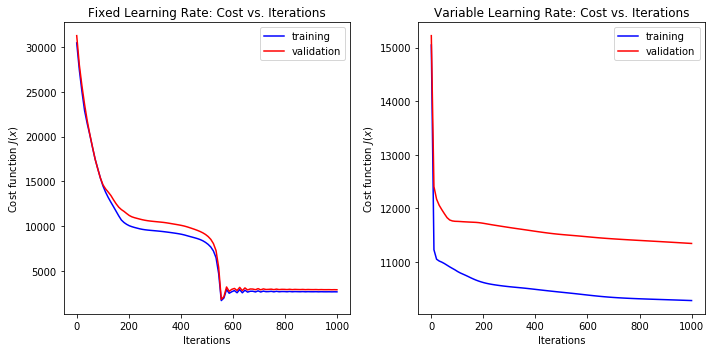

In [69]:
# TO DO
n_iter = 1000
w0 = np.ones(training_X.shape[1])
x0 = np.ones(training_X.shape[1])

# COST FUNCTIONS
cost_training = loss(w0, training_X, training_y)
cost_validation = loss(w0, validation_X, validation_y)

# FIXED LEARNING RATE
# training data:
w_fixed_training, J_fixed_training, w_hist_fixed_training = gradient_descent_fixed(cost_training, x0, 0.00001, n_iter)
# validation data:
J_fixed_validation = [cost_validation(w_fixed) for w_fixed in w_hist_fixed_training]

x = np.linspace(0, n_iter, n_iter//10)
fig = plt.figure(1, figsize=(10,5))

fixed = plt.subplot(121)
fixed.plot(x, J_fixed_training, 'b', label='training')
fixed.plot(x, J_fixed_validation, 'r', label='validation')
fixed.set_xlabel('Iterations')
fixed.set_ylabel(r'Cost function $J(x)$')
fixed.set_title('Fixed Learning Rate: Cost vs. Iterations')
fixed.legend()

# VARIABLE LEARNING RATE
# training data:
w_variable_training, J_variable_training, w_hist_variable_training = gradient_descent_variable(cost_training, x0, 0.001, n_iter)
# validation data:
J_variable_validation = [cost_validation(w_variable) for w_variable in w_hist_variable_training]

variable = plt.subplot(122)
variable.plot(x, J_variable_training, 'b', label='training')
variable.plot(x, J_variable_validation, 'r', label='validation')
variable.set_xlabel('Iterations')
variable.set_ylabel(r'Cost function $J(x)$')
variable.set_title('Variable Learning Rate: Cost vs. Iterations')
variable.legend()

plt.tight_layout();

### Part (e) (10 pts) Evaluating the model on the test set

Finally, we have trained our models and are ready to evaluate them on the test set.  For binary classification one way to check our classifier is to make a confusion matrix of our predictions.
$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$
The diagonal elements are the number of samples that are correctly classified.

Use your trained models to classify samples in the test set according to whether $h(x_i; w) \ge 0.5$ or not and print the confusion matrices.  Also print the accuracy rate which is just the percentage of correctly classified examples for both models.

In [70]:
cost_test = loss(w0, test_X, test_y)

fixed_test_h = logistic_unit(test_X, w_fixed_training)
fixed_test_pred = [1 if h_i >= 0.5 else 0 for h_i in fixed_test_h]

variable_test_h = logistic_unit(test_X, w_variable_training)
variable_test_pred = [1 if h_i >= 0.5 else 0 for h_i in variable_test_h]

def confusion_matrix(actual, pred):
    conf_matrix = np.asarray([[0,0],[0,0]])
    for i in range(actual.shape[0]):
        if pred[i]:
            if actual[i]: # pred 1 actual 1
                conf_matrix[1,1] += 1
            else: # pred 1 acutal 0
                conf_matrix[1,0] += 1
        else:
            if actual[i]: # pred 0 actual 1
                conf_matrix[0,1] += 1
            else: # pred 0 acutal 0
                conf_matrix[0,0] += 1
    return conf_matrix
def accuracy(conf_matrix):
    TP = conf_matrix[1,1]
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    return (TP+TN)/(TP+TN+FP+FN)*100

print('FIXED LEARNING RATE:')
fixed_conf_matrix = confusion_matrix(test_y, fixed_test_pred)
print('Confusion matrix =\n', confusion_matrix(test_y, fixed_test_pred))
print('Accuracy:', accuracy(fixed_conf_matrix), '%\n')

print('VARIABLE LEARNING RATE:')
variable_conf_matrix = confusion_matrix(test_y, variable_test_pred)
print('Confusion matrix =\n', confusion_matrix(test_y, variable_test_pred))
print('Accuracy:', accuracy(variable_conf_matrix), '%')

FIXED LEARNING RATE:
Confusion matrix =
 [[825 324]
 [137 714]]
Accuracy: 76.95 %

VARIABLE LEARNING RATE:
Confusion matrix =
 [[742 138]
 [220 900]]
Accuracy: 82.1 %
